In this notebook we will use the nn class **Sequential** to model a CNN

We will use the single target network

# Import

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

from sklearn.model_selection import KFold

from tqdm import tqdm

import load_script
from params import *
from custom_layers import *
from training import *
from networks import *

from utilities import *
from parse_dataset import *

In [2]:
# %load_ext autoreload
# %autoreload 2

# Loading the dataset

In [3]:
folder=Dataset(base_directory='/home/stefano/',dataset='eeg')

Reading data from /home/stefano/EEG//
Reading data from /home/stefano/EEG//stored//
Reading data from /home/stefano/EEG//__pycache__//
Reading data from /home/stefano/EEG//data//
Reading data from /home/stefano/EEG//stefano//
Reading data from /home/stefano/EEG//stefano//__pycache__//
Reading data from /home/stefano/EEG//stefano//notebook//


In [4]:
# train_dataset,train_target=load_script.load_dataset_1000hz(train=True)

In [5]:
# test_dataset,test_target=load_script.load_dataset_1000hz(train=False)

In [6]:
train_dataset,train_target=load_script.load_dataset(train=True)

In [7]:
test_dataset,test_target=load_script.load_dataset(train=False)

# Normalization

In [8]:
train_dataset.shape

torch.Size([316, 28, 50])

In [9]:
test_dataset.shape

torch.Size([100, 28, 50])

In [10]:
mean=train_dataset.mean(0).mean(1).view(1,28,1)
std=train_dataset.std(2).mean(0).view(1,28,1)

In [11]:
train_dataset=(train_dataset-mean)/std
test_dataset=(test_dataset-mean)/std

# Defining the network

### Simple Network

# Training

  2%|▏         | 6/300 [00:00<00:05, 56.47it/s]

Dropout 0
46.0
Network:

[28, 28, 3, 1, 0, True]
[28, 28, 3, 1, 0, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:07<00:00, 42.62it/s]


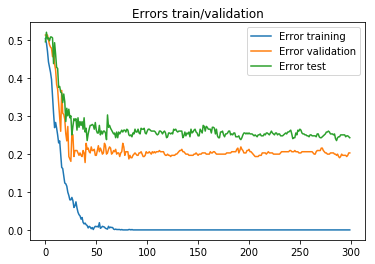

  2%|▏         | 6/300 [00:00<00:05, 50.72it/s]

Performance train: 0.0
Performance validation: 0.202995780591
Performance test: 0.2504
Dropout 0.1
46.0
Network:

[28, 28, 3, 1, 0.1, True]
[28, 28, 3, 1, 0.1, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:07<00:00, 42.19it/s]


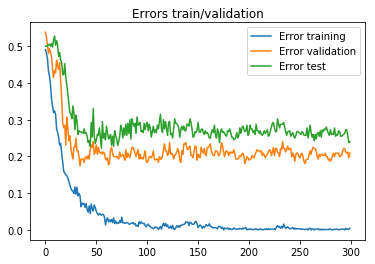

  2%|▏         | 6/300 [00:00<00:05, 52.92it/s]

Performance train: 0.00309423347398
Performance validation: 0.207215189873
Performance test: 0.265333333333
Dropout 0.2
46.0
Network:

[28, 28, 3, 1, 0.2, True]
[28, 28, 3, 1, 0.2, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:08<00:00, 36.97it/s]


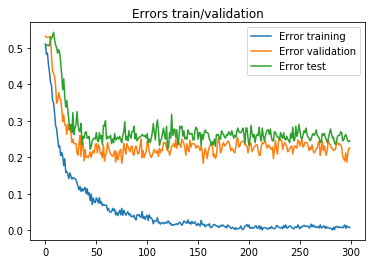

  2%|▏         | 6/300 [00:00<00:05, 54.54it/s]

Performance train: 0.00884669479606
Performance validation: 0.227257383966
Performance test: 0.2576
Dropout 0.3
46.0
Network:

[28, 28, 3, 1, 0.3, True]
[28, 28, 3, 1, 0.3, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:06<00:00, 43.47it/s]


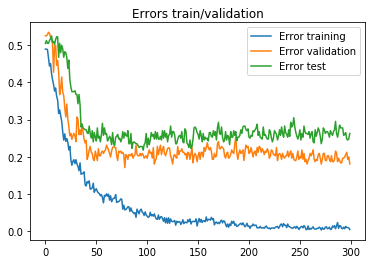

  2%|▏         | 6/300 [00:00<00:05, 52.92it/s]

Performance train: 0.00992967651195
Performance validation: 0.198860759494
Performance test: 0.264233333333
Dropout 0.4
46.0
Network:

[28, 28, 3, 1, 0.4, True]
[28, 28, 3, 1, 0.4, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:08<00:00, 36.90it/s]


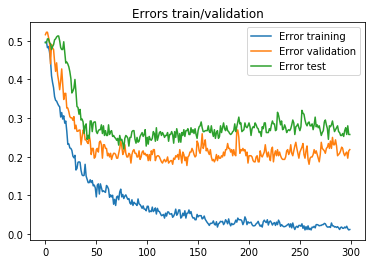

  2%|▏         | 5/300 [00:00<00:06, 43.90it/s]

Performance train: 0.0199437412096
Performance validation: 0.212911392405
Performance test: 0.277566666667
Dropout 0.5
46.0
Network:

[28, 28, 3, 1, 0.5, True]
[28, 28, 3, 1, 0.5, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:07<00:00, 43.10it/s]


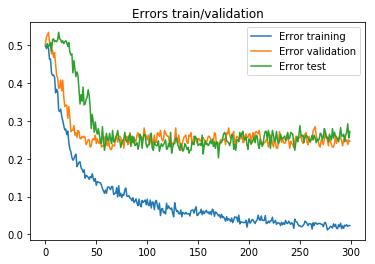

  2%|▏         | 6/300 [00:00<00:05, 56.03it/s]

Performance train: 0.025682137834
Performance validation: 0.248987341772
Performance test: 0.257766666667
Dropout 0.6
46.0
Network:

[28, 28, 3, 1, 0.6, True]
[28, 28, 3, 1, 0.6, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:06<00:00, 42.91it/s]


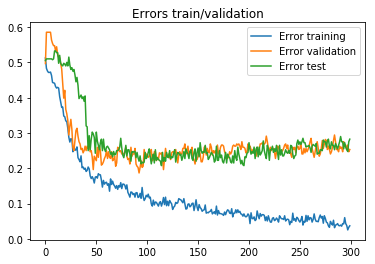

  2%|▏         | 6/300 [00:00<00:05, 56.55it/s]

Performance train: 0.0507032348805
Performance validation: 0.256455696203
Performance test: 0.259566666667
Dropout 0.7
46.0
Network:

[28, 28, 3, 1, 0.7, True]
[28, 28, 3, 1, 0.7, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:06<00:00, 43.09it/s]


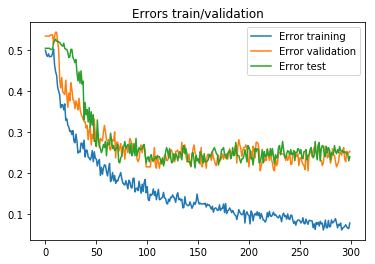

  2%|▏         | 6/300 [00:00<00:05, 54.79it/s]

Performance train: 0.0805485232068
Performance validation: 0.240168776371
Performance test: 0.2505
Dropout 0.8
46.0
Network:

[28, 28, 3, 1, 0.8, True]
[28, 28, 3, 1, 0.8, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:06<00:00, 40.85it/s]


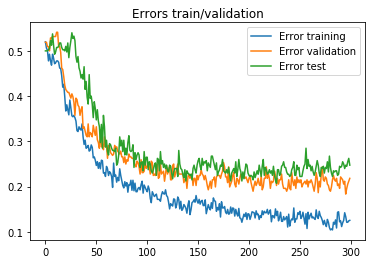

  2%|▏         | 5/300 [00:00<00:05, 49.48it/s]

Performance train: 0.128509142053
Performance validation: 0.209282700422
Performance test: 0.2389
Dropout 0.9
46.0
Network:

[28, 28, 3, 1, 0.9, True]
[28, 28, 3, 1, 0.9, True]
[1288, 200]
[200, 2]

Repetition 0


100%|██████████| 300/300 [00:07<00:00, 42.40it/s]


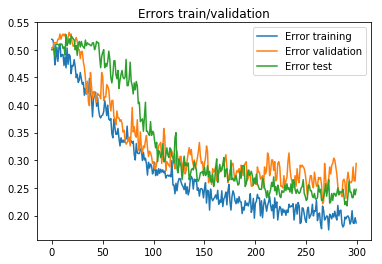

Performance train: 0.201758087201
Performance validation: 0.266582278481
Performance test: 0.241833333333


In [19]:
dropout_values=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results=[]
for dropout in dropout_values:
    print('Dropout',dropout)
    cv=CrossValidation(k=4,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target,cuda=True)
    
    net_type=DoubleCNNLayers
    optimizer_type=optim.Adam
    criterion_type=nn.CrossEntropyLoss
    network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[3,3,3],
                                 linear_filters=[200,2],
                                 dropout_rate=dropout,batch_norm=True,conv1D=True)
    optimizer_params=OptimizerParams()
    train_params=TrainParams(max_epoch=300,mini_batch_size=79)


    params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
                  optimizer_params=optimizer_params,train_params=train_params,cuda=True)

    cv(params,repetitions=1,cross_validation=True,repetitions_test=4)
    results.append(cv.result)

In [17]:
save=True
if save:
    file_name=folder.stored+'single_layer'
    write_pickle(results,file_name)

In [ ]:
cv=CrossValidation(k=2,train_dataset=train_dataset,test_dataset=test_dataset,
                   train_target=train_target,test_target=test_target)

net_type=ThreeLayers2D
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(conv_filters=[28,28,28],conv_kernels=[(3,1),(5,3),(3,3)],
                             linear_filters=[200,2],
                             dropout_rate=0,batch_norm=False,conv1D=False)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100,mini_batch_size=79)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

cv(params)

In [ ]:
net_type=ThreeLayers
optimizer_type=optim.Adam
criterion_type=nn.CrossEntropyLoss
network_params=NetworkParams(linear_filters=[200,2],dropout_rate=0)
optimizer_params=OptimizerParams()
train_params=TrainParams(max_epoch=100)


params=Params(net_type,optimizer_type,criterion_type,network_params=network_params,
              optimizer_params=optimizer_params,train_params=train_params,)

train=Train(train_dataset=train_dataset,test_dataset=test_dataset,
            train_target=train_target,test_target=test_target)
train(params)